## Reading Libraries 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import nltk
from nltk.tokenize import MWETokenizer
import pandas as pd

In [ ]:
nltk.download('punkt')

In [2]:
unlab_data1 = pd.read_csv('unlabeled_data.csv')

In [3]:
unlab_data = unlab_data1[1:1000]

## Case Normalisation and Tokenization

In [4]:
def token(raw_data):
    #for raw_data in data:
        raw_data1 = raw_data.lower()
        tokenised = nltk.tokenize.word_tokenize(raw_data1)
        return(tokenised)

In [5]:
s1=[]
for i in unlab_data['text']:
    #print(i)
    #s1 = token(i)
    s1.append(token(i))
    print(s1)
#len(s1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



## Unpack the list of list

In [6]:
from __future__ import division
from itertools import chain
token_words = list(chain.from_iterable(s1))
token_words

['on',
 'my',
 'first',
 'to',
 'montreal',
 'with',
 'my',
 'gf',
 'we',
 'came',
 'here',
 'to',
 'eat',
 'a',
 'nice',
 'mid',
 'day',
 'lunch',
 'before',
 'walking',
 'around',
 'more',
 'and',
 'departing',
 'from',
 'montreal',
 '.',
 'now',
 'obviously',
 'i',
 'am',
 'one',
 'that',
 'has',
 'a',
 'love/hate',
 'relationship',
 'with',
 'spots',
 'that',
 'are',
 'touristy',
 'and',
 'well',
 'known',
 'but',
 'in',
 'this',
 'case',
 'it',
 'was',
 'worth',
 'it',
 '.',
 'i',
 'liked',
 'the',
 'fact',
 'that',
 'we',
 'walked',
 'down',
 'a',
 'nice',
 'cobblestone',
 'corridor',
 'then',
 'was',
 'greeted',
 'by',
 'the',
 'hostess',
 'who',
 'promptly',
 'showed',
 'us',
 'to',
 'our',
 'table',
 '.',
 'our',
 'seating',
 'was',
 'right',
 'in',
 'front',
 'where',
 'they',
 'had',
 'two',
 'jazz',
 'players',
 'performing',
 'throughout',
 'the',
 'lunch',
 'playing',
 'soft',
 'melodies',
 'for',
 'all',
 'of',
 'the',
 'diners',
 'entertainment',
 'and',
 'i',
 'always'

In [7]:
len(token_words)

141570

## Removing stop words

In [8]:
stopwords = []
with open('./stopwords_en.txt') as f:
    stopwords = f.read().splitlines()

In [9]:
filtered_s2 = [] 
filtered_s2 = [w for w in token_words if not w in stopwords] 
len(filtered_s2)

66401

### The number of removed words

In [11]:
141570 - 66401

75169

## Removing Most Frequent Words 

In [12]:
from nltk.probability import *
f2 = FreqDist(filtered_s2)
f2.most_common(10)

[('.', 7278),
 (',', 4175),
 ('!', 1319),
 ("n't", 941),
 ("'s", 729),
 ('food', 587),
 ('good', 542),
 ('place', 524),
 (')', 497),
 ('(', 453)]

In [13]:
len(f2)

9420

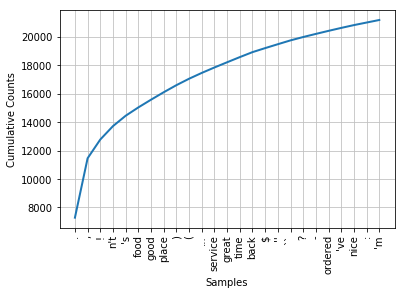

In [14]:
f2.plot(25, cumulative=True)

In [ ]:
from collections import Counter
counts = Counter(filtered_s2)

In [ ]:
length = len(counts.keys())

In [ ]:
delList = []
for k,v in counts.items():
    threshold = int((v/length) * 100)
    if threshold <5 or threshold > 95:
        delList.append(k)
    

In [ ]:
for k in delList:
   # if k in delList:
        del counts[k]
    

In [ ]:
len(counts)